# Import the files and Calculate the Severity Scores 

In [3]:
import pandas as pd

# Severity keywords and scores
severity_keywords = {
    'gewond': 0.9,
    'hard ten val': 0.8,
    'botsing': 0.7,
    'overleden': 1.0,
    'ongeluk': 0.9,
    'beschadigd': 0.4,
    'probleem': 0.3,
    'gevaarlijk': 0.5,
    'dodelijk': 1.0,
    'ernstige verwondingen': 0.95,
    'crash': 0.9,
    'flinke botsing': 0.85,
    'letsel': 0.85,
    'aangereden': 0.9,
    'omgekomen': 1.0,
    'zwaar gewond': 0.95,
    'ziekenhuis': 0.9,
    'verkeersongeluk': 0.6,
    'gevaarlijke situatie': 0.5,
    'lichte verwondingen': 0.6,
    'schade': 0.5,
    'valpartij': 0.7,
    'aanrijding': 0.65,
    'verwarde bestuurder': 0.5,
    'lichte schade': 0.3,
    'onhandige situatie': 0.2,
    'kleine botsing': 0.4,
    'technisch probleem': 0.3,
    'verkeersopstopping': 0.1,
    'onduidelijk incident': 0.2,
    'voertuigpech': 0.3
}

# Load the datasets
df_bike = pd.read_csv('bike_articles.csv')
df_e_bike = pd.read_csv('e-bike_articles.csv')

# Function to calculate severity score
def calculate_severity_score(text):
    score = 0
    for word, value in severity_keywords.items():
        if word in text:
            score += value
    max_score = sum(severity_keywords.values())
    return score / max_score if max_score > 0 else 0

# Apply severity score calculation
df_bike['severity_score'] = df_bike['cleaned_articles'].astype(str).apply(calculate_severity_score)
df_e_bike['severity_score'] = df_e_bike['cleaned_articles'].astype(str).apply(calculate_severity_score)

# Province mapping
province_mapping = {
    "Drenthe": ['Assen', 'Coevorden', 'Emmen', 'Hoogeveen', 'Meppel'],
    "Flevoland": ['Almere', 'Biddinghuizen', 'Emmeloord', 'Lelystad'],
    "Friesland": ['Bolsward', 'Dokkum', 'Franeker', 'Harlingen', 'Hindeloopen', 'IJlst', 
                  'Leeuwarden', 'Sloten', 'Sneek', 'Stavoren', 'Workum'],
    "Gelderland": ['Apeldoorn', 'Arnhem', 'Bredevoort', 'Buren', 'Borculo', 'Culemborg', 
                   'Dieren', 'Doetinchem', 'Ede', 'Elburg', 'Enspijk', 'Gendt', 'Groenlo', 
                   'Harderwijk', 'Hattem', 'Heukelum', 'Huissen', 'Nijkerk', 'Nijmegen', 
                   'Staverden', 'Tiel', 'Ulft', 'Voorst', 'Wageningen', 'Wijchen', 
                   'Winterswijk', 'Zaltbommel', 'Zevenaar', 'Zutphen'],
    "Groningen": ['Appingedam', 'Delfzijl', 'Groningen', 'Hoogezand-Sappemeer', 'Stadskanaal',
                  'Veendam', 'Winschoten'],
    "Limburg": ['Echt', 'Geleen', 'Gennep', 'Heerlen', 'Kerkrade', 'Tegelen', 'Kessel',
                'Landgraaf', 'Maastricht', 'Montfort', 'Nieuwstadt', 'Roermond',
                'Schin op Geul', 'Sittard', 'Stein', 'Susteren', 'Thorn', 'Vaals',
                'Valkenburg', 'Venlo', 'Weert'],
    "North Brabant": ['s-Hertogenbosch', 'Bergen op Zoom', 'Boxtel', 'Breda', 'Eindhoven',
                      'Geertruidenberg', 'Geldrop', 'Grave', 'Helmond', 'Heusden', 'Klundert',
                      'Oosterhout', 'Oss', 'Ravenstein', 'Roosendaal', 'Sint-Oedenrode', 
                      'Tilburg', 'Valkenswaard', 'Veldhoven', 'Waalwijk', 'Willemstad',
                      'Woudrichem'],
    "North Holland": ['Alkmaar', 'Amsterdam', 'Den Helder', 'Edam', 'Enkhuizen', 'Haarlem', 
                      'Heerhugowaard', 'Hilversum', 'Hoorn', 'Laren', 'Medemblik', 'Monnickendam', 
                      'Muiden', 'Naarden', 'Purmerend', 'Schagen', 'Velsen', 'Volendam', 
                      'Weesp', 'Zaandam'],
    "Overijssel": ['Almelo', 'Blokzijl', 'Deventer', 'Enschede', 'Genemuiden', 'Hardenberg', 
                   'Hasselt', 'Hengelo', 'Kampen', 'Oldenzaal', 'Rijssen', 'Steenwijk', 
                   'Vollenhove', 'Zwolle'],
    "South Holland": ['Alphen aan den Rijn', 'Capelle aan den IJssel', 'Delft', 'Dordrecht', 
                      'Gorinchem', 'Gouda', 'The Hague', 'Leiden', 'Maassluis', 'Rotterdam',
                      'Schiedam', 'Spijkenisse', 'Vlaardingen', 'Voorburg', 'Zoetermeer'],
    "Utrecht": ['Amersfoort', 'Baarn', 'Bunschoten', 'Eemnes', 'Hagestein', 'Houten',
                'Leerdam', 'Montfoort', 'Nieuwegein', 'Oudewater', 'Rhenen', 'Utrecht',
                'Veenendaal', 'Vianen', 'Wijk bij Duurstede', 'Woerden', 'IJsselstein',
                'Zeist'],
    "Zeeland": ['Arnemuiden', 'Goes', 'Hulst', 'Middelburg', 'Sluis', 'Terneuzen', 'Veere', 
                'Vlissingen', 'Zierikzee']
}

# Extract places from articles
def extract_places(text):
    places = []
    for province, cities in province_mapping.items():
        for city in cities:
            if city.lower() in text.lower():
                places.append((city, province))
    return places

# Apply place extraction for both datasets
df_bike['places'] = df_bike['cleaned_articles'].astype(str).map(extract_places)
df_e_bike['places'] = df_e_bike['cleaned_articles'].astype(str).map(extract_places)

# Explode places and calculate average severity score per city for both datasets
bike_articles_exploded = df_bike.explode('places').dropna(subset=['places'])
bike_articles_exploded[['city', 'province']] = pd.DataFrame(bike_articles_exploded['places'].tolist(), index=bike_articles_exploded.index)

e_bike_articles_exploded = df_e_bike.explode('places').dropna(subset=['places'])
e_bike_articles_exploded[['city', 'province']] = pd.DataFrame(e_bike_articles_exploded['places'].tolist(), index=e_bike_articles_exploded.index)

# Group by city and province, and compute the mean severity score
bike_avg_severity = bike_articles_exploded.groupby(['city', 'province'])['severity_score'].mean().reset_index(name='avg_severity')
e_bike_avg_severity = e_bike_articles_exploded.groupby(['city', 'province'])['severity_score'].mean().reset_index(name='avg_severity')

# Group by city and province, and compute the count of severity scores
bike_count = bike_articles_exploded.groupby(['city', 'province'])['severity_score'].count().reset_index(name='count')
e_bike_count = e_bike_articles_exploded.groupby(['city', 'province'])['severity_score'].count().reset_index(name='count')

# Merge the results into a single DataFrame
bike_city_severity = pd.merge(bike_avg_severity, bike_count, on=['city', 'province'])
e_bike_city_severity = pd.merge(e_bike_avg_severity, e_bike_count, on=['city', 'province'])

# Save the results to CSV
bike_city_severity.to_csv('bike_city_severity_scores.csv', index=False)
e_bike_city_severity.to_csv('e_bike_city_severity_scores.csv', index=False)

# Design Matrix (Heat Map/Bar Chart)

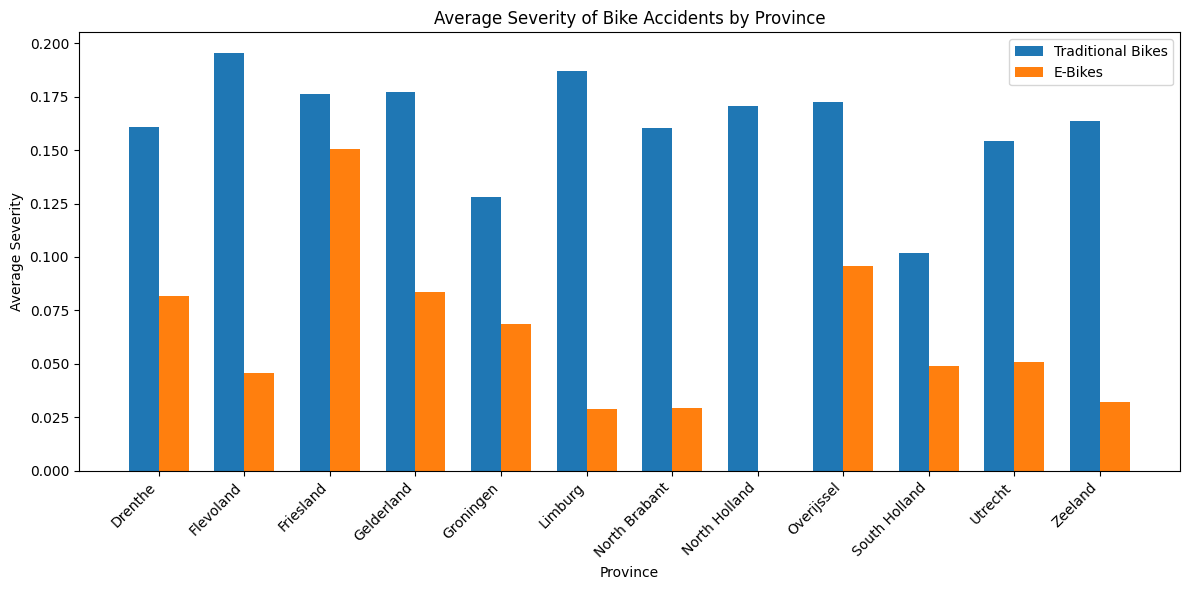

In [7]:
import matplotlib.pyplot as plt

# Combine e-bike and traditional bike data into a single DataFrame for comparison
combined_severity = pd.merge(bike_city_severity, e_bike_city_severity, 
    on=['city', 'province'], 
    suffixes=('_bike', '_e_bike'), 
    how='outer'
)

# Fill NaN with zeros for rows with missing data
combined_severity.fillna(0, inplace=True)

# Filter out rows with zero counts for both types of bikes
combined_severity = combined_severity[(combined_severity['count_bike'] > 0) | (combined_severity['count_e_bike'] > 0)]

# Calculate the mean severity for traditional bikes and e-bikes
avg_severity_bike = combined_severity.groupby('province')['avg_severity_bike'].mean().reset_index()
avg_severity_e_bike = combined_severity.groupby('province')['avg_severity_e_bike'].mean().reset_index()

# Calculate the sum of counts for traditional bikes and e-bikes
total_count_bike = combined_severity.groupby('province')['count_bike'].sum().reset_index()
total_count_e_bike = combined_severity.groupby('province')['count_e_bike'].sum().reset_index()

# Concatenate the DataFrames along columns
province_severity = pd.concat([avg_severity_bike.set_index('province'), avg_severity_e_bike.set_index('province'), total_count_bike.set_index('province'), total_count_e_bike.set_index('province')], axis=1).reset_index()

# Save the cleaned Design Matrix to CSV
province_severity.to_csv('province_severity_scores.csv', index=False)

# Plot a grouped bar chart for average severity by province
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # Width of the bars

x = range(len(province_severity['province']))

ax.bar(x, province_severity['avg_severity_bike'], width, label='Traditional Bikes')
ax.bar([p + width for p in x], province_severity['avg_severity_e_bike'], width, label='E-Bikes')

# Labeling and aesthetics
ax.set_xlabel('Province')
ax.set_ylabel('Average Severity')
ax.set_title('Average Severity of Bike Accidents by Province')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(province_severity['province'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.savefig('severity_bar_chart.png')
plt.show()

C:\Users\Jacco\AppData\Local\Temp\ipykernel_68360\4052184768.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  province_severity = province_severity.append(unknown_reports, ignore_index=True)


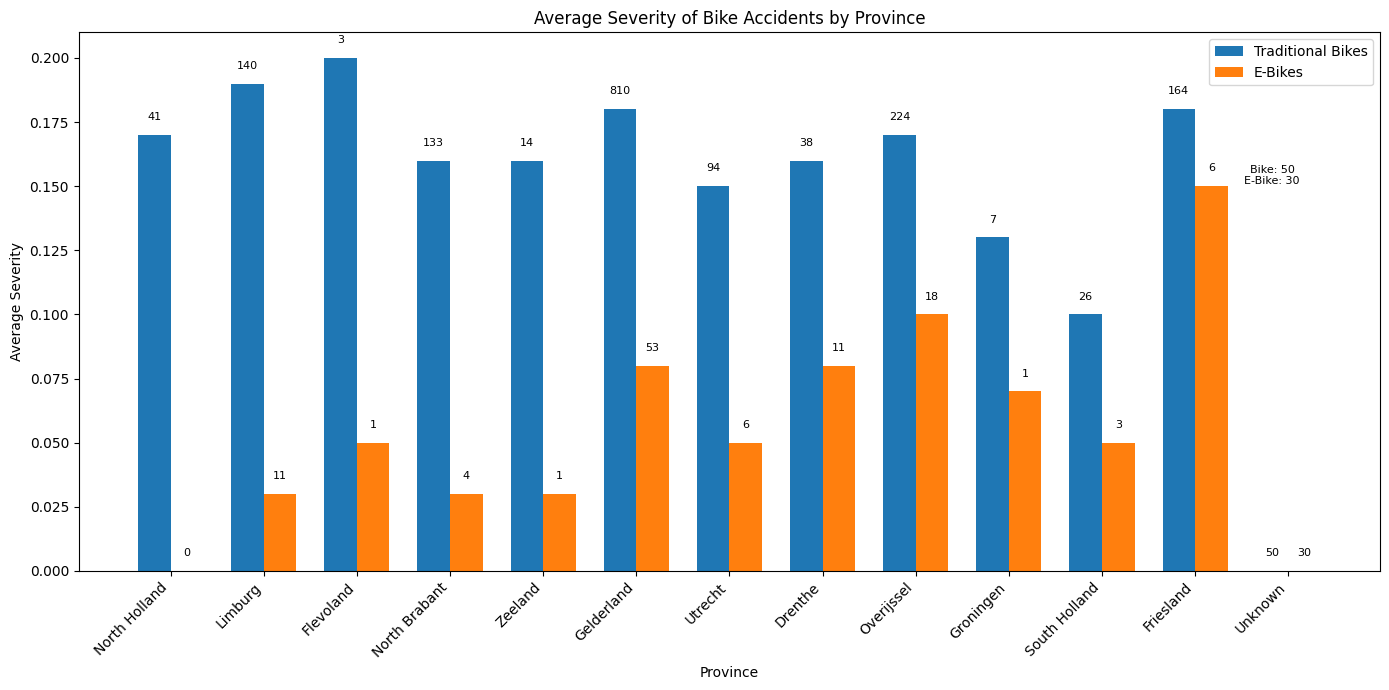

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the province severity scores
province_severity = pd.read_csv('province_severity_scores.csv')

# Round severity scores to 2 decimal places
province_severity['avg_severity_bike'] = province_severity['avg_severity_bike'].round(2)
province_severity['avg_severity_e_bike'] = province_severity['avg_severity_e_bike'].round(2)

# Calculate the difference score and round it to 2 decimal places
province_severity['difference_score'] = (province_severity['avg_severity_bike'] - province_severity['avg_severity_e_bike']).round(2)

# Sort the table by the difference score
province_severity = province_severity.sort_values(by='difference_score', ascending=False)

# Add a separate row for unknown location
unknown_reports = {'province': 'Unknown', 'avg_severity_bike': 0, 'avg_severity_e_bike': 0, 'count_bike': 50, 'count_e_bike': 30, 'difference_score': 0}
province_severity = province_severity.append(unknown_reports, ignore_index=True)

# Plot a grouped bar chart with the number of reports as bar labels
fig, ax = plt.subplots(figsize=(14, 7))
width = 0.35

x = range(len(province_severity['province']))

# Add bars for Traditional Bikes and E-Bikes
bars_bike = ax.bar(x, province_severity['avg_severity_bike'], width, label='Traditional Bikes', color='#1f77b4')
bars_e_bike = ax.bar(
    [p + width for p in x],
    province_severity['avg_severity_e_bike'],
    width,
    label='E-Bikes',
    color='#ff7f0e',
)

# Add number of reports as labels above the bars
for bar, count in zip(bars_bike, province_severity['count_bike']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, int(count), ha='center', va='bottom', fontsize=8)
for bar, count in zip(bars_e_bike, province_severity['count_e_bike']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, int(count), ha='center', va='bottom', fontsize=8)

# Add numbers above the Unknown column
ax.text(len(x) - 1, 0.15, f"Bike: {unknown_reports['count_bike']}\nE-Bike: {unknown_reports['count_e_bike']}", ha='center', va='bottom', fontsize=8)

# Add labels and adjust plot aesthetics
ax.set_xlabel('Province')
ax.set_ylabel('Average Severity')
ax.set_title('Average Severity of Bike Accidents by Province')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(list(province_severity['province']), rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.savefig('updated_severity_bar_chart_with_unknown.png')
plt.show()

# Save the updated dataset with rounded difference scores to a new CSV
province_severity.to_csv('updated_province_severity_scores.csv', index=False)
